### Preprocessing

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('data/iris.csv')
df.head() #show 5 samples from head
#df.tail()  #5 samples from tail

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

--------------------

.apply

In [6]:
df['Species'] = df['Species'].apply(lambda x: 0 if x=='Iris-setosa' else x)
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


.map

In [7]:
d = {'Iris-setosa':0, 
     'Iris-versicolor':1,
     'Iris-virginica' :2}

df=pd.read_csv('data/iris.csv')
df['Species'] = df['Species'].map(d)
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


--------

Numpy Array

In [8]:
import numpy as np
np.unique(df['Species']) #Check whether mapping is correct

array([0, 1, 2], dtype=int64)

In [9]:
y=df['Species'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [10]:
X = df.iloc[:,1:5].values #SepalLength ~ PetalWidth
X[:5] #first 5 samples 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

--------

##### Matplotlib

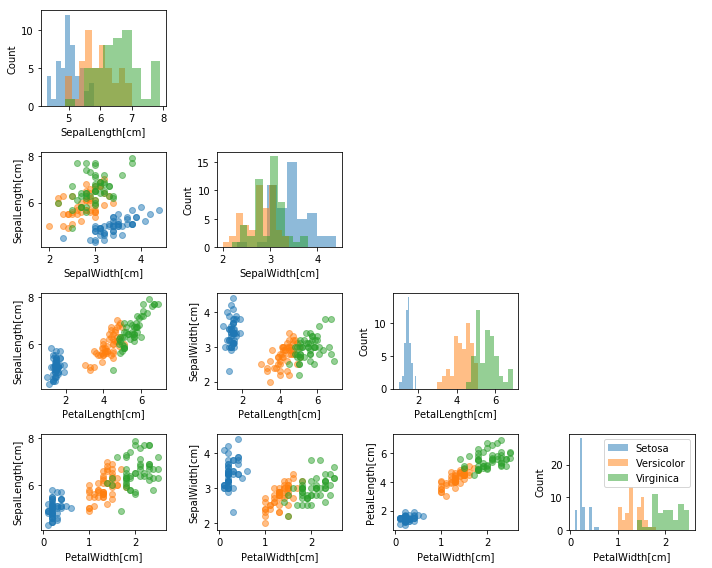

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix

names = df.columns[1:5]

fig, axes = scatterplotmatrix(X[y==0], figsize=(10,8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig,axes), alpha=0.5)
flg, axes = scatterplotmatrix(X[y==2], fig_axes=(fig,axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['Setosa','Versicolor','Virginica'])
plt.savefig('eda.pdf')
plt.show()

-------------------

##### Python Class

In [31]:
class VehicleClass():
    
    def __init__(self,horsepower):
        "this is init method"
        self.horsepower=horsepower
    
    def horsepower_to_torque(self,rpm):
        "this is regular method"
        numerator = self.horsepower*33000
        denominator = 2*np.pi*5000
        return numerator/denominator
    
    def tune_motor(self):
        self.horsepower *= 2
        
    def _private_method(self):
        print("this is private")
        
    def __very_private_method(self):
        print("this is very private")

In [32]:
car1 = VehicleClass(horsepower=123)
print(car1.horsepower)
print(car1.horsepower_to_torque(rpm=5000))
car1.tune_motor()
print(car1.horsepower)

123
129.20198280200063
246


In [33]:
car1._private_method()

this is private


In [34]:
car1.__very_private_method()

AttributeError: 'VehicleClass' object has no attribute '__very_private_method'

In [35]:
car1._VehicleClass__very_private_method()

this is very private


In [38]:
class CarClass(VehicleClass):
    
    def __init__(self,horsepower):
        super(CarClass,self).__init__(horsepower)
        self.num_wheels = 4

new_car = CarClass(horsepower=123)
print("Number of wheels:",new_car.num_wheels)
print("Horsepower:",new_car.horsepower)
new_car.tune_motor()
print("Horsepower:",new_car.horsepower)

Number of wheels: 4
Horsepower: 123
Horsepower: 246
